In [ ]:
# Import libraries
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Set training device
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Define hyperparameters
num_epochs = 10
batch_size = 8
learning_rate = 0.001

# Define data transforms
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Custom Dataset Class

In [4]:
# Define custom dataset
class DeepFakeDataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.data_path = data_path
        self.transform = transform
        self.images = []
        self.labels = []
        
        #get images from Real and Fake folder
        for label in ['Real', 'Fake']:
            folder_path = os.path.join(data_path, label)
            for img_file in os.listdir(folder_path)[:10000]:  # Take first 10000 images only
                self.images.append(os.path.join(folder_path, img_file)) #add image
                self.labels.append(0 if label == 'Real' else 1) #add label
        
    def __len__(self):
        return len(self.images)
    
    #get image at idx index
    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_path).convert('RGB')
        
        #transform image if possible
        if self.transform:
            image = self.transform(image)
        
        return image, label


In [5]:
# Load datasets
train_dataset = DeepFakeDataset('data/Train', transform=train_transforms)
val_dataset = DeepFakeDataset('data/Validation', transform=test_transforms)
test_dataset = DeepFakeDataset('data/Test', transform=test_transforms)

#put dataset into DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Custom CNN Model

In [ ]:
class ModernCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ModernCNN, self).__init__()
        

        # Each set of layers follows
        # 1) convolutional layer followed by batch normalization layer followed by ReLU activation functtion
        # or
        # 2) convolutional layer followed by batch normalization layer followed by ReLU activation functtion followed by max pooling function

        # Set 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)

        # Set 2
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Set 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU(inplace=True)

        # Set 4
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Set 5
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.relu5 = nn.ReLU(inplace=True)

        # Set 6
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.relu6 = nn.ReLU(inplace=True)

        # Set 7
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.relu7 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        # Set 8
        self.conv8 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn8 = nn.BatchNorm2d(512)
        self.relu8 = nn.ReLU(inplace=True)

        # Set 9
        self.conv9 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.bn9 = nn.BatchNorm2d(512)
        self.relu9 = nn.ReLU(inplace=True)

        # Set 10
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.bn10 = nn.BatchNorm2d(512)
        self.relu10 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Adaptive Average pooling layer and dropout layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.5)
        
        # Fully connected layer
        self.fc1 = nn.Linear(512, 4096)
        # ReLU activation function
        self.relu11 = nn.ReLU(inplace=True)
        # Dropout layer
        self.dropout2 = nn.Dropout(p=0.5)

        # Fully connected layer
        self.fc2 = nn.Linear(4096, 4096)
        # ReLU activation function
        self.relu12 = nn.ReLU(inplace=True)
        # Dropout layer
        self.fc3 = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        # Forward pass data through layers

        out = self.relu1(self.bn1(self.conv1(x)))
        out = self.maxpool1(self.relu2(self.bn2(self.conv2(out))))
        
        out = self.relu3(self.bn3(self.conv3(out)))
        out = self.maxpool2(self.relu4(self.bn4(self.conv4(out))))
        
        out = self.relu5(self.bn5(self.conv5(out)))
        out = self.relu6(self.bn6(self.conv6(out)))
        out = self.maxpool3(self.relu7(self.bn7(self.conv7(out))))
        
        out = self.relu8(self.bn8(self.conv8(out)))
        out = self.relu9(self.bn9(self.conv9(out)))
        out = self.maxpool4(self.relu10(self.bn10(self.conv10(out))))
        
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        
        out = self.relu11(self.fc1(out))
        out = self.dropout2(out)
        out = self.relu12(self.fc2(out))
        out = self.fc3(out)
        
        return out

In [7]:
# Check if trained model exists
model_path = 'model.pkl'
if os.path.exists(model_path):
    # Load the trained model
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    print("Loaded trained model from", model_path)
else:
    # Create a new model
    model = ModernCNN().to(device)
    print("Created a new model")

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Loaded trained model from model.pkl


# Model training and validation

In [8]:
# Lists to store metrics for plotting
train_losses = []
train_accs = []
val_accs = []

In [9]:
# Train the model
for epoch in range(num_epochs): #for each epoch
    model.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"): #for each image in epoch
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
        
        _, preds = torch.max(outputs, 1) #get predictions
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())
        
    train_loss = train_loss / len(train_dataset)
    train_acc = accuracy_score(train_labels, train_preds)
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    
    # Validation
    model.eval()
    val_preds = []
    val_labels = []
    
    with torch.no_grad():
        for images, labels in val_loader: #for image in validation
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            
            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy()) 
            
    val_acc = accuracy_score(val_labels, val_preds)
    val_accs.append(val_acc)
    print(f"Validation Acc: {val_acc:.4f}")

Epoch 1/10:   0%|          | 0/7500 [00:00<?, ?batch/s]

Epoch 1/10: 100%|██████████| 7500/7500 [03:50<00:00, 32.51batch/s]


Epoch 1/10 - Train Loss: 0.2660, Train Acc: 0.8890
Validation Acc: 0.8460


Epoch 2/10: 100%|██████████| 7500/7500 [04:24<00:00, 28.36batch/s]


Epoch 2/10 - Train Loss: 0.2239, Train Acc: 0.9063
Validation Acc: 0.8522


Epoch 3/10: 100%|██████████| 7500/7500 [04:18<00:00, 28.98batch/s]


Epoch 3/10 - Train Loss: 0.2011, Train Acc: 0.9175
Validation Acc: 0.8585


Epoch 4/10: 100%|██████████| 7500/7500 [11:05<00:00, 11.28batch/s]   


Epoch 4/10 - Train Loss: 0.1862, Train Acc: 0.9230
Validation Acc: 0.8625


Epoch 5/10: 100%|██████████| 7500/7500 [03:28<00:00, 35.92batch/s]


Epoch 5/10 - Train Loss: 0.1733, Train Acc: 0.9284
Validation Acc: 0.8624


Epoch 6/10: 100%|██████████| 7500/7500 [03:26<00:00, 36.30batch/s]


Epoch 6/10 - Train Loss: 0.1638, Train Acc: 0.9342
Validation Acc: 0.8579


Epoch 7/10: 100%|██████████| 7500/7500 [06:33<00:00, 19.07batch/s]  


Epoch 7/10 - Train Loss: 0.1582, Train Acc: 0.9346
Validation Acc: 0.8628


Epoch 8/10: 100%|██████████| 7500/7500 [04:15<00:00, 29.36batch/s]


Epoch 8/10 - Train Loss: 0.1514, Train Acc: 0.9376
Validation Acc: 0.8617


Epoch 9/10: 100%|██████████| 7500/7500 [04:11<00:00, 29.78batch/s]


Epoch 9/10 - Train Loss: 0.1454, Train Acc: 0.9404
Validation Acc: 0.8526


Epoch 10/10: 100%|██████████| 7500/7500 [03:32<00:00, 35.24batch/s]


Epoch 10/10 - Train Loss: 0.1387, Train Acc: 0.9440
Validation Acc: 0.8639


In [18]:
# Save the trained model
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print("Saved trained model to", model_path)

Saved trained model to model.pkl


# Testing

In [19]:
# Test the model
model.eval()
test_preds = []
test_labels = []
test_probs = []

with torch.no_grad():
    for images, labels in test_loader: #for image in testing
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.cpu().numpy()) 
        test_labels.extend(labels.cpu().numpy())
        test_probs.extend(probs.cpu().numpy())

# Statistics and Graphs

In [21]:
test_acc = accuracy_score(test_labels, test_preds)
test_precision = precision_score(test_labels, test_preds)
test_recall = recall_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds)

# Convert test_probs to a NumPy array
test_probs = np.array(test_probs)

test_auc = roc_auc_score(test_labels, test_probs[:, 1])

#print statistics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test AUC-ROC: {test_auc:.4f}")

Test Accuracy: 0.8055
Test Precision: 0.8129
Test Recall: 0.7973
Test F1 Score: 0.8050
Test AUC-ROC: 0.8911


Confusion Matrix:
[[4405 1008]
 [1113 4379]]


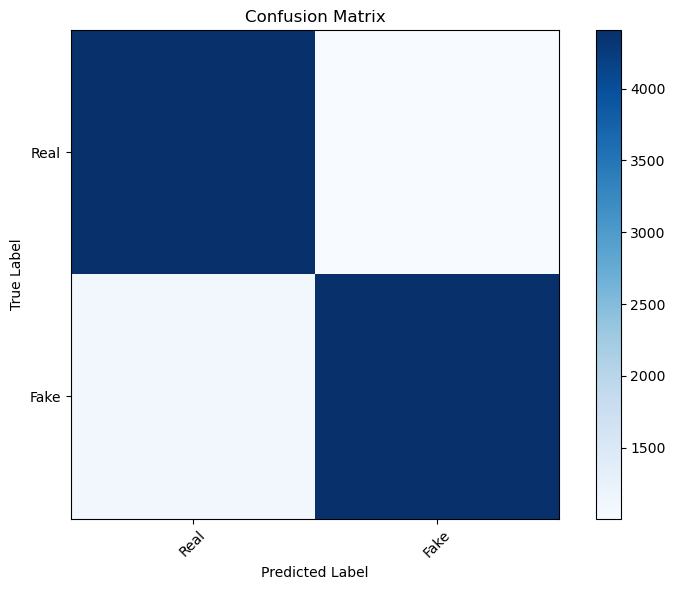

In [22]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_preds)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(['Real', 'Fake']))
plt.xticks(tick_marks, ['Real', 'Fake'], rotation=45)
plt.yticks(tick_marks, ['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

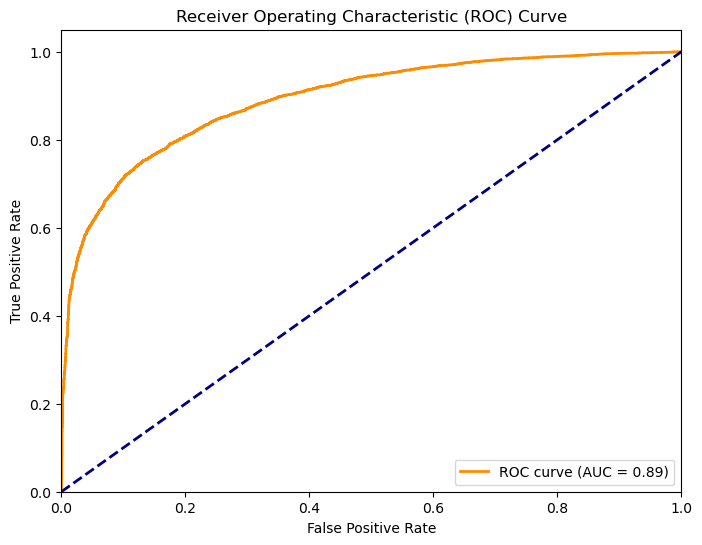

In [23]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


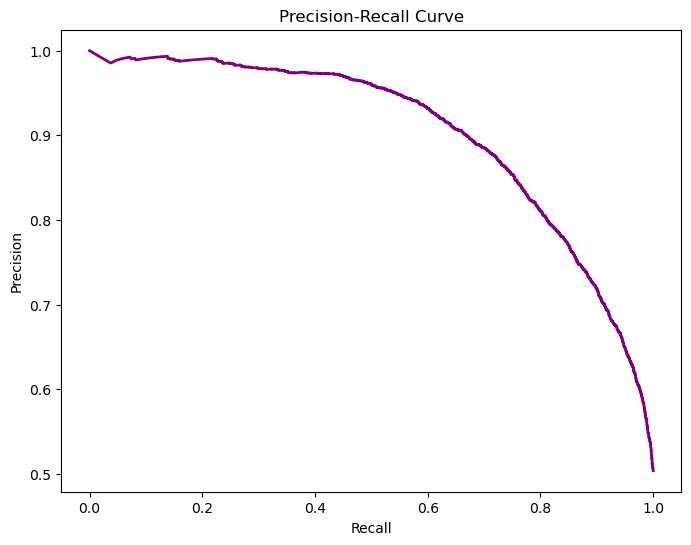

In [24]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(test_labels, test_probs[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


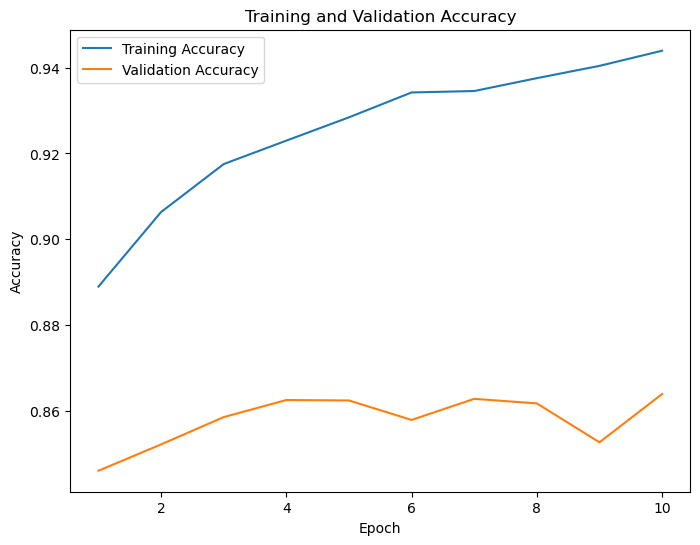

In [25]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), train_accs, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

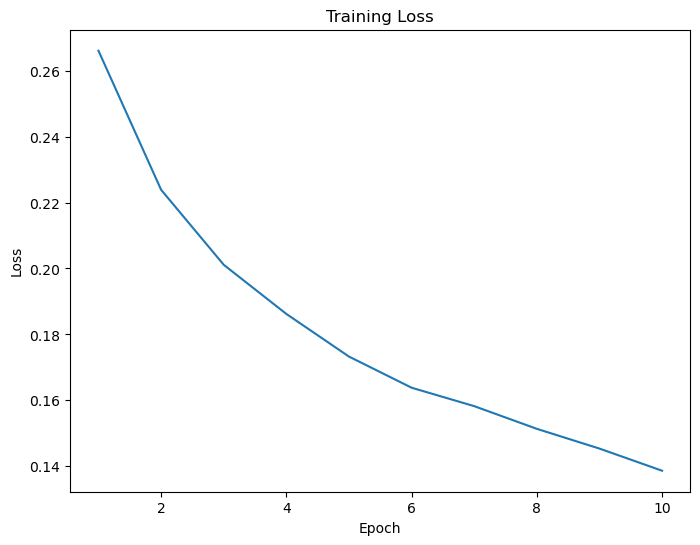

In [26]:
# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()